In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



In [3]:
data = pd.read_csv('./data/treino.csv')
data

,id,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,y
0,0,6.564539,0.005402,-0.046048,0.082720,0.025483,0.012840,0.012074,0.015706,0.019474,...,0.004677,0.006341,0.004652,0.008265,0.001942,0.006023,0.003802,-0.006645,0.004731,teens
1,1,6.272916,-0.050610,0.079147,0.051565,0.039750,0.024608,0.007396,-0.000113,0.010413,...,0.000279,0.003451,0.004072,-0.001063,0.000887,-0.001818,0.000567,-0.004009,-0.002465,twenties
2,2,6.109420,0.149254,-0.024532,0.058759,0.024705,-0.005258,-0.011766,0.036307,-0.116146,...,-0.001559,0.002674,0.005249,-0.002725,0.000793,0.002473,0.002813,-0.004865,-0.006467,fourties
3,3,5.769757,0.118987,-0.142818,0.266039,-0.144302,0.062644,-0.036074,-0.007810,-0.059597,...,-0.004636,-0.006736,-0.009979,-0.004465,-0.007968,-0.008652,-0.008678,-0.012818,-0.003198,twenties
4,4,5.959087,0.199252,-0.126957,0.125780,-0.004105,-0.054833,-0.035830,-0.000890,-0.051578,...,-0.011336,-0.021308,-0.005701,-0.010904,-0.014085,-0.000995,-0.007513,-0.003199,-0.012306,teens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,5.984490,0.053315,-0.042023,0.047830,-0.019244,-0.046589,0.010900,-0.056706,-0.004145,...,0.003048,0.000266,-0.005563,0.001938,-0.003351,0.005081,-0.007575,0.005039,-0.010748,twenties
3496,3496,6.394997,0.071473,0.004922,0.005652,0.039168,-0.041011,0.015375,-0.058066,-0.004499,...,0.001090,-0.003133,-0.013673,-0.003264,-0.001776,-0.018846,0.005435,-0.009341,-0.003002,fifties
3497,3497,5.914190,0.345414,-0.117653,0.063194,-0.086075,0.086425,-0.175410,-0.005695,-0.025939,...,0.016025,-0.010143,-0.000345,0.000274,-0.002794,-0.002423,0.000475,0.003006,-0.010567,fourties
3498,3498,5.426918,0.271221,-0.023893,0.124361,-0.077775,0.033935,-0.113375,-0.007114,-0.022291,...,-0.001238,-0.006894,0.000604,-0.001819,-0.003945,-0.001115,-0.006675,-0.003233,-0.009256,teens


In [4]:
X = data.to_numpy()[:,1:40]
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,6.564539,0.005402,-0.046048,0.08272,0.025483,0.01284,0.012074,0.015706,0.019474,-0.000007,...,0.003625,0.004677,0.006341,0.004652,0.008265,0.001942,0.006023,0.003802,-0.006645,0.004731
1,6.272916,-0.05061,0.079147,0.051565,0.03975,0.024608,0.007396,-0.000113,0.010413,-0.00969,...,0.009418,0.000279,0.003451,0.004072,-0.001063,0.000887,-0.001818,0.000567,-0.004009,-0.002465
2,6.10942,0.149254,-0.024532,0.058759,0.024705,-0.005258,-0.011766,0.036307,-0.116146,0.001421,...,0.014951,-0.001559,0.002674,0.005249,-0.002725,0.000793,0.002473,0.002813,-0.004865,-0.006467
3,5.769757,0.118987,-0.142818,0.266039,-0.144302,0.062644,-0.036074,-0.00781,-0.059597,0.002855,...,-0.011383,-0.004636,-0.006736,-0.009979,-0.004465,-0.007968,-0.008652,-0.008678,-0.012818,-0.003198
4,5.959087,0.199252,-0.126957,0.12578,-0.004105,-0.054833,-0.03583,-0.00089,-0.051578,-0.050316,...,-0.024509,-0.011336,-0.021308,-0.005701,-0.010904,-0.014085,-0.000995,-0.007513,-0.003199,-0.012306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,5.98449,0.053315,-0.042023,0.04783,-0.019244,-0.046589,0.0109,-0.056706,-0.004145,-0.027816,...,-0.005505,0.003048,0.000266,-0.005563,0.001938,-0.003351,0.005081,-0.007575,0.005039,-0.010748
3496,6.394997,0.071473,0.004922,0.005652,0.039168,-0.041011,0.015375,-0.058066,-0.004499,-0.003758,...,0.010728,0.00109,-0.003133,-0.013673,-0.003264,-0.001776,-0.018846,0.005435,-0.009341,-0.003002
3497,5.91419,0.345414,-0.117653,0.063194,-0.086075,0.086425,-0.17541,-0.005695,-0.025939,-0.050318,...,-0.014447,0.016025,-0.010143,-0.000345,0.000274,-0.002794,-0.002423,0.000475,0.003006,-0.010567
3498,5.426918,0.271221,-0.023893,0.124361,-0.077775,0.033935,-0.113375,-0.007114,-0.022291,-0.024963,...,-0.011851,-0.001238,-0.006894,0.000604,-0.001819,-0.003945,-0.001115,-0.006675,-0.003233,-0.009256


In [5]:
Y = data.to_numpy()[:,40]
pd.DataFrame(Y).T

,0,1,2,3,4,5,6,7,8,9,...,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499
0,teens,twenties,fourties,twenties,teens,twenties,teens,twenties,teens,teens,...,teens,fifties,fourties,fifties,fourties,twenties,fifties,fourties,teens,fourties


In [6]:
from sklearn.preprocessing import StandardScaler

scaler_dataset = StandardScaler()
scalerX = scaler_dataset.fit_transform(X)

In [7]:
Y.shape[0]

3500

In [8]:
from sklearn.preprocessing import OneHotEncoder

Yaux = Y.reshape((Y.shape[0],1))
oneHotEncoder = OneHotEncoder()

encoder = OneHotEncoder(drop='first').fit(Yaux)

In [9]:
Y_new = encoder.transform(Yaux).toarray()

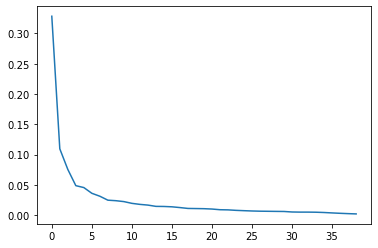

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=39)
pca.fit(scalerX)

plt.plot(pca.explained_variance_ratio_)

In [11]:
X_new = pca.fit_transform(scalerX)
X_new = X_new[:,0:19]

In [12]:
pd.DataFrame(X_new)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.624040,-1.776894,-1.523080,-1.837602,-3.774599,-0.080440,-0.662152,-0.677487,0.820887,-0.767999,-0.127921,-0.197580,1.404905,-0.706408,-0.201359,1.236397,-0.649448,-0.108638,0.064804
1,-2.784822,-2.140929,-1.482274,-1.843434,-1.326455,-0.862011,-0.063435,0.062292,0.163780,-0.060093,-0.598991,0.484510,0.042955,-0.621509,0.277459,-0.113961,0.145526,0.197861,-0.495530
2,-2.482139,0.317495,-2.902170,2.681732,0.069552,-1.749670,-0.863023,1.773881,0.634916,2.653326,0.978244,1.488307,-0.336178,-0.091212,-0.875143,-1.833826,-0.677944,0.021169,-0.425710
3,0.050429,2.573560,-0.538356,0.645452,-0.219110,-0.971809,-0.101738,-0.465310,-0.701165,0.353292,-0.002133,0.331096,-0.031274,0.056181,-0.492898,0.728233,-1.441126,1.455987,0.687347
4,-1.120595,0.070555,2.583798,0.158862,2.078494,-0.618368,1.180769,-1.416636,-0.900238,1.654688,1.207827,0.704626,-1.222065,0.995366,-0.711580,0.900735,0.882273,-0.701056,0.917342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,-2.718990,-1.715602,1.642761,-0.653235,0.112815,0.852532,-0.366295,0.031988,0.504266,-0.218253,0.607463,0.100085,-1.039151,-1.055629,0.694589,0.286800,0.334471,0.012000,-0.018723
3496,-1.782797,-0.699989,-1.453574,-1.670312,-0.050317,1.609881,-2.113123,-0.975201,1.393761,0.037060,0.327403,0.297823,-0.086051,-0.711244,1.669924,0.828203,0.154993,1.256655,-0.463312
3497,0.653318,0.393944,3.653959,-0.335001,1.261150,0.411735,2.627421,0.708026,-0.272182,0.382455,0.813438,-1.243272,1.902909,-0.989397,-0.328820,-0.327387,0.691150,0.236927,0.425256
3498,-0.740739,1.076869,0.674290,0.965172,0.945203,-0.262081,0.908394,0.212097,-1.279649,0.736455,-0.126137,-0.829065,0.116860,-0.317570,0.178912,0.521973,-0.159252,-0.508947,-1.401015


In [13]:
X_train, X_test, y_train, y_test = train_test_split( X_new, Y_new, test_size=0.33, random_state=42)

In [14]:
y_train

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [15]:
X_trainTensor = tf.constant(X_train)
Y_trainTensor = tf.constant(y_train)
X_testTensor = tf.constant(X_test)
Y_testTensor = tf.constant(y_test)

In [16]:
X_trainAux, X_testAux, y_trainAux, y_testAux = train_test_split( scalerX, Y, test_size=0.33, random_state=42)
y_trainAux.shape

(2345,)

In [17]:
Yaux = y_trainAux.reshape((y_trainAux.shape[0],1))
oneHotEncoder = OneHotEncoder()
Y_new = encoder.transform(Yaux).toarray()
Y_new

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [40]:
Yaux2 = y_testAux.reshape((y_testAux.shape[0],1))
oneHotEncoder = OneHotEncoder()
Y_new2 = encoder.transform(Yaux2).toarray()
Y_new2

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

# Reshape to 3D

O Convolution1D espera 3D dimension

Flatten adiciona uma dimensão

DropOut gera um numero aleatorio no treinamento

In [18]:
X_trainReshape = X_train.reshape((2345,19,1))
X_trainReshape.shape

(2345, 19, 1)

In [41]:
X_test.shape

(1155, 19)

In [19]:
X_testAuxReshape = X_test.reshape(1155,19,1)

In [20]:
X_trainAux.shape

(2345, 39)

In [ ]:
X_

In [21]:
X_trainAuxReshape = X_trainAux.reshape((2345,39,1))

In [330]:
model = tf.keras.Sequential(name = 'rede29')

#model.add(tf.keras.Input(shape=(X_trainReshape.shape[1],X_trainAuxReshape.shape[2])))

model.add(tf.keras.layers.Dense(32,activation = tf.keras.activations.relu))
#model.add(tf.keras.layers.Dense(100,activation = tf.keras.activations.relu))

#model.add(tf.keras.layers.Conv1D(filters = 4, kernel_size =2))

model.add(tf.keras.layers.Dense(16,activation = tf.keras.activations.sigmoid))
#model.add(tf.keras.layers.Dense(4,activation = tf.keras.activations.relu))

#model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(32,activation = tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(4,activation = tf.keras.activations.relu))


model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
             loss = [
                     tf.keras.losses.mean_squared_logarithmic_error,
                    ],
               
             metrics='accuracy',
             )

In [331]:
hist = model.fit(X_train,Y_new, batch_size=100, epochs=100, verbose=1)

Epoch 1/100
24/24 [==============================] - 1s 4ms/step - loss: 0.0810 - accuracy: 0.4422
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0673 - accuracy: 0.5424
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0618 - accuracy: 0.5650
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0537 - accuracy: 0.6337
Epoch 5/100
24/24 [==============================] - 0s 7ms/step - loss: 0.0480 - accuracy: 0.6793
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.6878
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0334 - accuracy: 0.7241
Epoch 8/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0268 - accuracy: 0.8375
Epoch 9/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0245 - accuracy: 0.8478
Epoch 10/100
24/24 [==============================] - 0s 7ms/step - loss: 0.0237 - accuracy: 0.8571
Epoch 11/

Epoch 83/100
24/24 [==============================] - 0s 5ms/step - loss: 0.0051 - accuracy: 0.9672
Epoch 84/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0049 - accuracy: 0.9667
Epoch 85/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 0.9663
Epoch 86/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 0.9667
Epoch 87/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.9697
Epoch 88/100
24/24 [==============================] - 0s 6ms/step - loss: 0.0049 - accuracy: 0.9667
Epoch 89/100
24/24 [==============================] - 0s 6ms/step - loss: 0.0049 - accuracy: 0.9659
Epoch 90/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 0.9684
Epoch 91/100
24/24 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9693
Epoch 92/100
24/24 [==============================] - 0s 7ms/step - loss: 0.0047 - accuracy: 0.9680


In [332]:
ypredTrain = model.predict(X_train)

In [333]:
(ypredTrain > 0)*1

array([[1, 0, 0, 0],
       [1, 0, 1, 0],
       [0, 1, 0, 0],
       ...,
       [0, 0, 1, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 0]])

In [334]:
accuracy_score(Y_new,(ypredTrain > 0)*1)

0.9155650319829425

In [335]:
ypredTest = model.predict(X_test)

In [336]:
accuracy_score(Y_new2,(ypredTest > 0)*1)

0.8

In [337]:
encoder.inverse_transform((ypredTest > 0))

array([['fifties'],
       ['thirties'],
       ['fourties'],
       ...,
       ['fifties'],
       ['fourties'],
       ['fourties']], dtype=object)